In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/Datasets/

/content/gdrive/MyDrive/Datasets


In [3]:
%ls

cat_disease/  dog_disease/  MODEL_TWO_v4.h5  model__v3.h5


In [4]:
dir_base = "cat_disease/cat_disease"

In [ ]:
import urllib.request
from tensorflow import keras

# Download the Cat_model.h5 file
cat_model_url = "https://storage.googleapis.com/hugging-pet_cloudbuild/Cat_model.h5"
cat_model_path = "/Cat_model.h5"
urllib.request.urlretrieve(cat_model_url, cat_model_path)

# Download the Dog_model.h5 file
dog_model_url = "https://storage.googleapis.com/hugging-pet_cloudbuild/Dog_model.h5"
dog_model_path = "/Dog_model.h5"
urllib.request.urlretrieve(dog_model_url, dog_model_path)

# Load the models
model_cat = keras.models.load_model(cat_model_path)
model_dog = keras.models.load_model(dog_model_path)

KeyboardInterrupt: ignored

In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img ,img_to_array
import PIL
from PIL import Image
import io
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
BATCH_SIZE = 20
IMG_SIZE = (224, 224)
EPOCHS = 10
class MODEL_TWO():
    def preprocessing(BASE_DIR, IMG_SIZE, BATCH_SIZE):
        Datagen = ImageDataGenerator(
            rescale=1/255.0,
            zoom_range=0.2,
            validation_split=0.2,
            brightness_range=[0.5, 1.5]
        )
        Train_Generator = Datagen.flow_from_directory(
            BASE_DIR,
            batch_size=BATCH_SIZE,
            target_size=IMG_SIZE,
            subset="training",
            class_mode="binary"
        )
        Validation_Generator = Datagen.flow_from_directory(
            BASE_DIR,
            batch_size=BATCH_SIZE,
            target_size=IMG_SIZE,
            subset="validation",
            class_mode="binary"
        )
        return Train_Generator, Validation_Generator

    def create_model(self):
        modeling = tf.keras.models.Sequential([
            Conv2D(64, (3, 3), 1, activation='relu', padding='same', input_shape=(224, 224, 3)),
            Conv2D(64, (3, 3), 1, activation='relu', padding='same'),
            MaxPooling2D((2, 2), strides=(2, 2)),
            Conv2D(128, (3, 3), 1, activation='relu', padding='same'),
            Conv2D(128, (3, 3), 1, activation='relu', padding='same'),
            Flatten(),
            Dense(256, activation='relu'),  # Increase the number of neurons
            Dropout(0.5),
            Dense(256, activation='relu'),  # Increase the number of neurons
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])


        modeling.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
        modeling.summary()
        return modeling

    def train_model(model, Train_Generator, Validation_Generator, EPOCHS):
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(Train_Generator, epochs=EPOCHS, validation_data=Validation_Generator, callbacks=[early_stopping])
        return model


if __name__ == '__main__':
    Train_Generator, validation_generator = MODEL_TWO.preprocessing(dir_base, IMG_SIZE, BATCH_SIZE)
    model_two_instance = MODEL_TWO()
    modeling = model_two_instance.create_model()
    model = MODEL_TWO.train_model(modeling, Train_Generator, validation_generator, EPOCHS)
    model.save("MODEL_TWO_v6.h5")

Found 474 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


KeyboardInterrupt: ignored

In [8]:
model_datasets = load_model('model__v3.h5')

In [ ]:
model_datasets.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
model_datasets = model

NameError: ignored

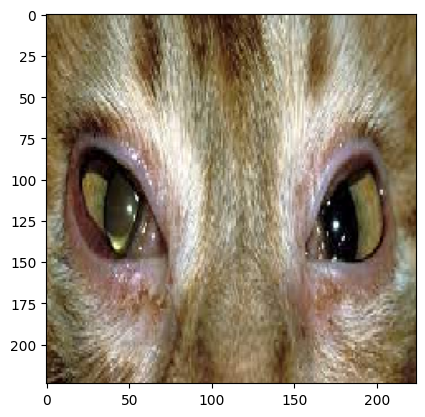

1/1 [==============================] - 0s 463ms/step
cat 2.jpg - konjungtivis
[0.20041136]


In [10]:
import os
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_path = "/content/cat 2.jpg"
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
plt.imshow(img.astype(np.uint8))
plt.show()
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model_datasets.predict(images, batch_size=10)

image = os.path.basename(img_path)  # Get the image filename

# predicted_class_idx = np.argmax(model_datasets)
# predicted_class = class_names[predicted_class_idx]
# prediction_probability = model_datasets[0][predicted_class_idx]
# other_probability = 1 - prediction_probability
# other_class = class_names[1 - predicted_class_idx]

if classes[0] > 0.5:
    print(image + " - earmites")
else:
    print(image + " - konjungtivis")
print(classes[0])

# print(f"Probabilitas prediksi {predicted_class}: {prediction_probability}")
# print(f"Probabilitas prediksi {other_class}: {other_probability}")

In [ ]:
label_cat = ["earmites", "konjungtivitis"]
label_dog = ["ringworm", "konjungtivitis"]


def predict_animal(model, label, request_files_key):
    if request.method == "POST":
        if request_files_key not in request.files:
            return jsonify({"error": "no file"})

        file = request.files[request_files_key]
        if file.filename == "":
            return jsonify({"error": "no file"})

        img = file.read()  # Read the file data
        img = load_img(io.BytesIO(img), target_size=(224, 224))
        x = img_to_array(img) / 255.0
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        prediction = classes[0][0]
        confidence = round(float(prediction), 2)
        image = file.filename

        if prediction > 0.5:
            result = label[0]
        else:
            result = label[1]

    return jsonify({"prediction": result, "confidence": confidence, "Picture": image})